<a href="https://colab.research.google.com/github/mrkofficial2/FM-Public/blob/main/easyocr.v1.0.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.4 MB/s 
     |████████████████████████████████| 604 kB 59.0 MB/s 
     |████████████████████████████████| 47.6 MB 1.5 MB/s 
     |████████████████████████████████| 120 kB 71.4 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [ ]:
# load example images
!npx degit mrkofficial2/FM-Public -f

npx: installed 1 in 1.188s
> destination directory is not empty. Using --force, continuing
> cloned mrkofficial2/FM-Public#HEAD


In [ ]:
# list them
!ls -all

total 2532
drwxrwxr-x 1 root root    4096 Sep 27 10:44  .
drwxr-xr-x 1 root root    4096 Oct  6 04:30  ..
drwxr-xr-x 4 root root    4096 Sep 26 13:44  .config
-rw-r--r-- 1 root root  784582 Sep 27 10:44  easyocr.ipynb
-rw-r--r-- 1 root root      34 Sep 27 10:44  README.md
drwxr-xr-x 1 root root    4096 Sep 26 13:45  sample_data
-rw-r--r-- 1 root root  110800 Sep 27 10:44 'Screenshot from 2022-09-14 18-38-03.png'
-rw-r--r-- 1 root root 1276674 Sep 27 10:44 'Screenshot from 2022-09-19 13-44-59.png'
-rw-r--r-- 1 root root   46968 Sep 27 10:44 'Screenshot from 2022-09-20 23-20-57.png'
-rw-r--r-- 1 root root  213895 Sep 27 10:44 'Screenshot from 2022-09-23 17-38-38.png'
-rw-r--r-- 1 root root   52018 Sep 27 10:44 'Screenshot from 2022-09-23 18-59-41.png'
-rw-r--r-- 1 root root   71872 Sep 27 10:44 'Screenshot from 2022-09-27 16-10-58.png'


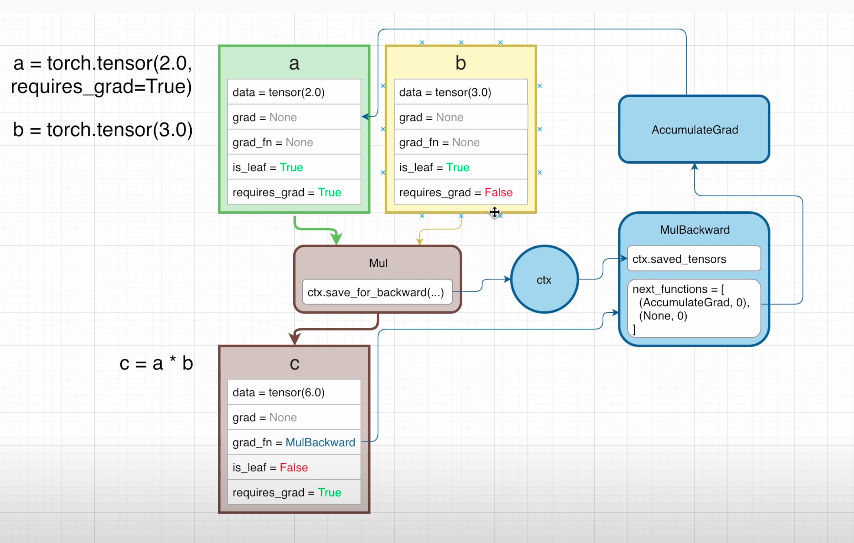

In [ ]:
# show an image
import PIL
from PIL import Image , ImageEnhance
from PIL import ImageDraw
from pathlib import Path
im = PIL.Image.open("Screenshot from 2022-09-23 17-38-38.png")
im

In [ ]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['en'])

In [ ]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext('Screenshot from 2022-09-23 17-38-38.png')
bounds

[([[13, 57], [43, 57], [43, 73], [13, 73]], 'a =', 0.6132867562172698),
 ([[42, 50], [192, 50], [192, 76], [42, 76]],
  'torch tensor(2.0,',
  0.8036798583013083),
 ([[6, 74], [194, 74], [194, 100], [6, 100]],
  'requires_grad=True)',
  0.8404046456766326),
 ([[231, 87], [259, 87], [259, 99], [231, 99]], 'data', 0.9906080961227417),
 ([[267, 87], [329, 87], [329, 101], [267, 101]],
  'tensori20)',
  0.8591235804540694),
 ([[397, 87], [425, 87], [425, 99], [397, 99]], 'data', 0.9999980926513672),
 ([[433, 85], [495, 85], [495, 101], [433, 101]],
  'tensori3.0}',
  0.45055548831330733),
 ([[269, 111], [299, 111], [299, 125], [269, 125]], 'Nonc', 0.621305525302887),
 ([[435, 111], [467, 111], [467, 125], [435, 125]],
  'Nonc',
  0.6105788350105286),
 ([[10, 116], [196, 116], [196, 142], [10, 142]],
  'b = torch.tensor(3.0)',
  0.8117701920206091),
 ([[651, 123], [741, 123], [741, 137], [651, 137]],
  'AccurulaleGrad',
  0.9607571379026594),
 ([[231, 137], [317, 137], [317, 151], [231, 151

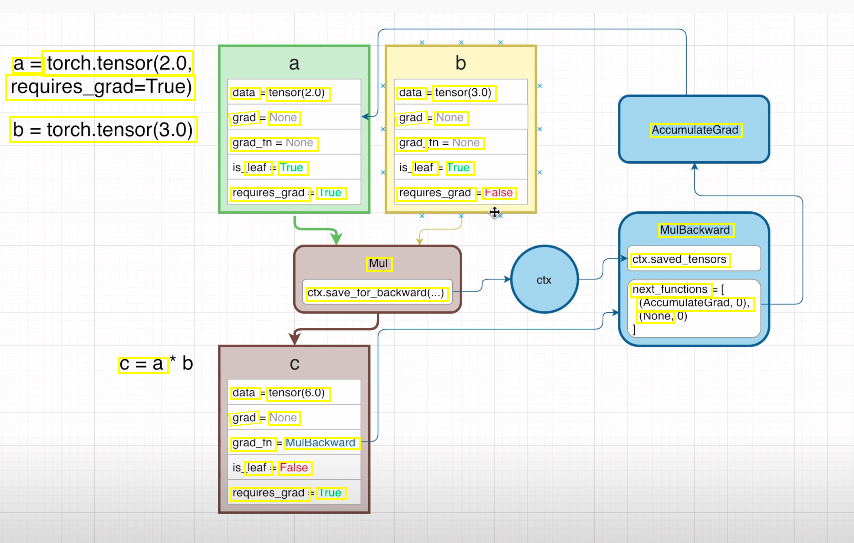

In [ ]:
# Draw bounding boxes

def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    count = 0
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        tl_x = p0[0]
        tl_y = p0[1]
        br_x = p2[0]
        br_y = p2[1]
        box = [tl_x, tl_y, br_x , br_y]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
        im2 = image.crop(box)
        #save_dir = Path('N:/home/chiku_arch/Documents/FuseEXTRACT/Sample_Outputs/')
        count_string = str(count)
        im2.save(str('new_image_' + count_string + '.png')) 
        count = count + 1       
    return image


draw_boxes(im, bounds)